In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO
import matplotlib.pyplot as plt


In [ ]:
tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)

tesla_data['Date'] = tesla_data['Date'].dt.tz_localize(None)

tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

if response.status_code != 200:
    raise Exception(f"Failed to fetch page. Status code: {response.status_code}")

html_data = response.text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

tesla_revenue = None
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        tesla_revenue = pd.read_html(StringIO(str(table)))[0]
        break

if tesla_revenue is None:
    raise Exception("Tesla revenue table not found.")

tesla_revenue.columns = ["Date", "Revenue"]

tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "")
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "")
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.strip()

tesla_revenue.dropna(inplace=True)

tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

tesla_revenue.tail()


,Date,Revenue
55,2011-12-31,39.0
56,2011-09-30,58.0
57,2011-06-30,58.0
58,2011-03-31,49.0
59,2010-12-31,36.0


In [ ]:
gme = yf.Ticker("GME")

gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)

gme_data['Date'] = gme_data['Date'].dt.tz_localize(None)

gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [ ]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

if response.status_code != 200:
    raise Exception(f"Failed to fetch page. Status code: {response.status_code}")

html_data = response.text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

gme_revenue = None
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue = pd.read_html(StringIO(str(table)))[0]
        break

if gme_revenue is None:
    raise Exception("GameStop revenue table not found.")

gme_revenue.columns = ["Date", "Revenue"]

gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "")
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "")
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.strip()

gme_revenue.dropna(inplace=True)

gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)

gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

gme_revenue.tail()


,Date,Revenue
54,2012-01-31,3579.0
55,2011-10-31,1947.0
56,2011-07-31,1744.0
57,2011-04-30,2281.0
58,2011-01-31,3693.0


In [ ]:
def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    plt.title(f"{stock_name} Stock Price and Revenue")

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='red', label='Revenue')
    ax2.set_ylabel('Revenue', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    plt.show()


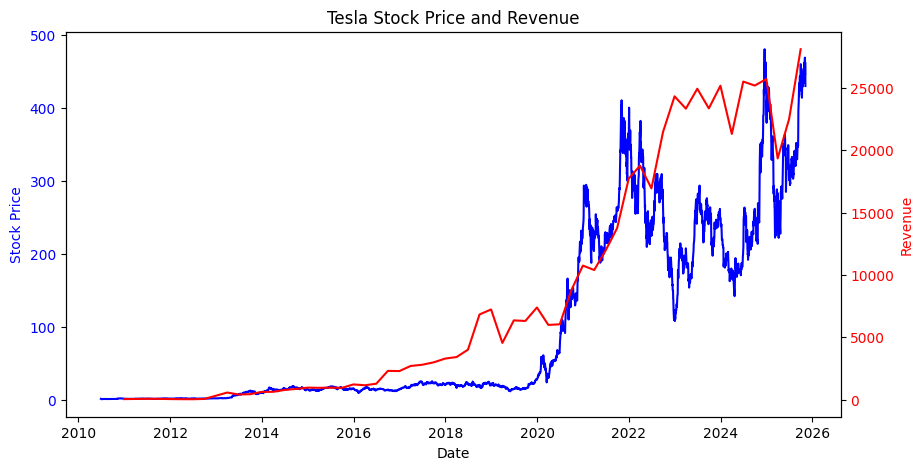

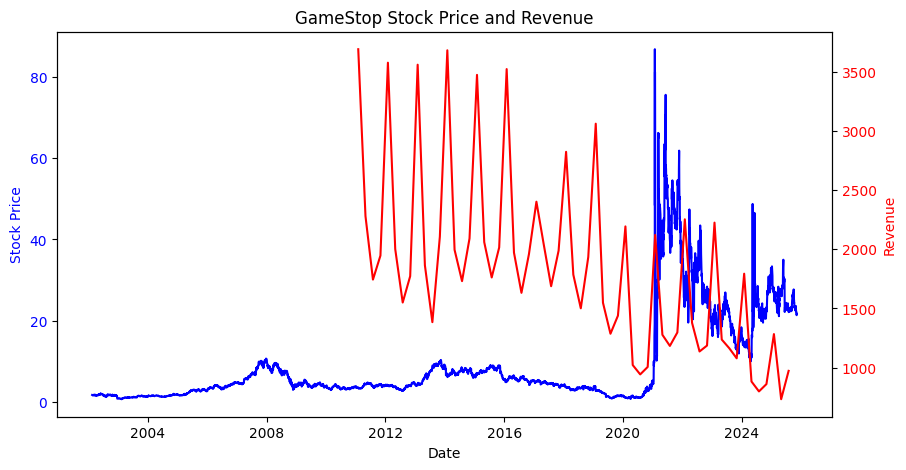

In [ ]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

make_graph(gme_data, gme_revenue, 'GameStop')
